## INTRODUCTION
* Movie reviews on platforms like IMDB contain valuable insights about audience opinions. This project uses deep learning to automatically classify movie reviews as positive  or negative, helping understand customer sentiment.

#### OBJECTIVES:
- Build an LSTM neural network to classify movie review sentiments
- Achieve high accuracy in distinguishing positive from negative reviews  
- Create a practical tool for real-time sentiment prediction
- Demonstrate the power of AI in understanding human emotions through text

* This analysis shows how artificial intelligence can automatically understand human opinions and emotions expressed in natural language, with practical applications in entertainment and marketing industries.

## LIBRARIES AND DATA LOADING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

2025-08-30 05:33:07.608387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756531987.819883      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756531987.877230      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load IMDB dataset

In [2]:
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv", encoding='latin-1')

print(f"Dataset loaded: {data.shape[0]:,} reviews")
print(f"Columns: {list(data.columns)}")

Dataset loaded: 50,000 reviews
Columns: ['review', 'sentiment']


## DATA EXPLORATION

In [3]:
def explore_data(data):
    """Basic data exploration"""
    print("\nDATA OVERVIEW")
    print("-" * 30)
    
    # Sentiment distribution
    sentiment_counts = data['sentiment'].value_counts()
    print("Sentiment Distribution:")
    for sentiment, count in sentiment_counts.items():
        print(f"• {sentiment}: {count:,} ({count/len(data)*100:.1f}%)")
    
    # Text statistics
    data['word_count'] = data['review'].str.split().str.len()
    print(f"\nAverage words per review: {data['word_count'].mean():.0f}")
    print(f"Longest review: {data['word_count'].max()} words")

explore_data(data)


DATA OVERVIEW
------------------------------
Sentiment Distribution:
• positive: 25,000 (50.0%)
• negative: 25,000 (50.0%)

Average words per review: 231
Longest review: 2470 words


In [4]:
print("Positive:", data[data['sentiment']=='positive']['review'].iloc[0][:100] + "...")
print("Negative:", data[data['sentiment']=='negative']['review'].iloc[0][:100] + "...")

Positive: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The...
Negative: Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his par...


## DATA PREPROCESSING

In [5]:
# Convert labels to binary
data.replace({'sentiment': {'positive': 1, 'negative': 0}}, inplace=True)

# Split data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create and fit tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])

# Convert texts to sequences and pad them
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=200)

y_train = train_data['sentiment'].values
y_test = test_data['sentiment'].values

print(f"\nData prepared:")
print(f"Training samples: {len(X_train):,}")
print(f"Testing samples: {len(X_test):,}")

/tmp/ipykernel_19/557827342.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sentiment': {'positive': 1, 'negative': 0}}, inplace=True)



Data prepared:
Training samples: 40,000
Testing samples: 10,000


## VISUALIZATIONS

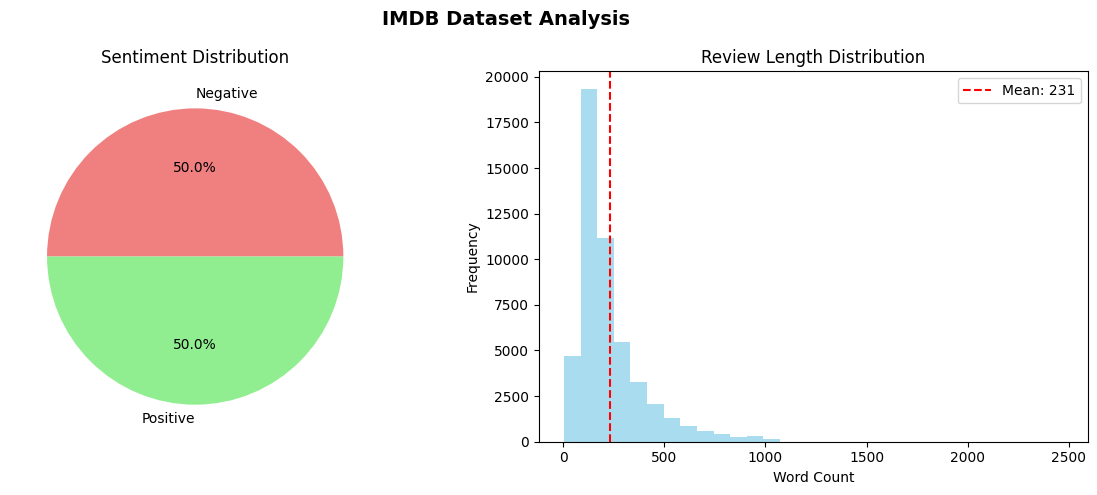

In [6]:
def create_data_visualizations(data):
    """Create simple visualizations"""
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('IMDB Dataset Analysis', fontsize=14, fontweight='bold')
    
    # Sentiment distribution
    sentiment_counts = data['sentiment'].value_counts()
    colors = ['lightcoral', 'lightgreen']
    axes[0].pie(sentiment_counts.values, labels=['Negative', 'Positive'], 
                autopct='%1.1f%%', colors=colors)
    axes[0].set_title('Sentiment Distribution')
    
    # Word count distribution
    axes[1].hist(data['word_count'], bins=30, alpha=0.7, color='skyblue')
    axes[1].set_title('Review Length Distribution')
    axes[1].set_xlabel('Word Count')
    axes[1].set_ylabel('Frequency')
    axes[1].axvline(data['word_count'].mean(), color='red', linestyle='--',
                    label=f'Mean: {data["word_count"].mean():.0f}')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

create_data_visualizations(data)

## MODEL BUILDING

In [7]:
def build_lstm_model():
    """Build simple LSTM model"""
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=200),
        LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create model
model = build_lstm_model()
print("\nModel Architecture:")
print("-" * 30)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Model Architecture:
------------------------------


I0000 00:00:1756532012.905617      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756532012.906231      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## MODEL TRAINING

In [8]:
print("\nTraining Model...")
print("-" * 30)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=3,
    batch_size=64,
    verbose=1
)

print("Training completed!")


Training Model...
------------------------------
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 222s 343ms/step - accuracy: 0.7328 - loss: 0.5196 - val_accuracy: 0.8230 - val_loss: 0.4126
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 340ms/step - accuracy: 0.8590 - loss: 0.3437 - val_accuracy: 0.8305 - val_loss: 0.3919
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 341ms/step - accuracy: 0.8858 - loss: 0.2877 - val_accuracy: 0.8205 - val_loss: 0.3978
Training completed!


## MODEL EVALUATION


MODEL PERFORMANCE
------------------------------
Test Accuracy: 0.8205 (82.05%)
Test Loss: 0.3978


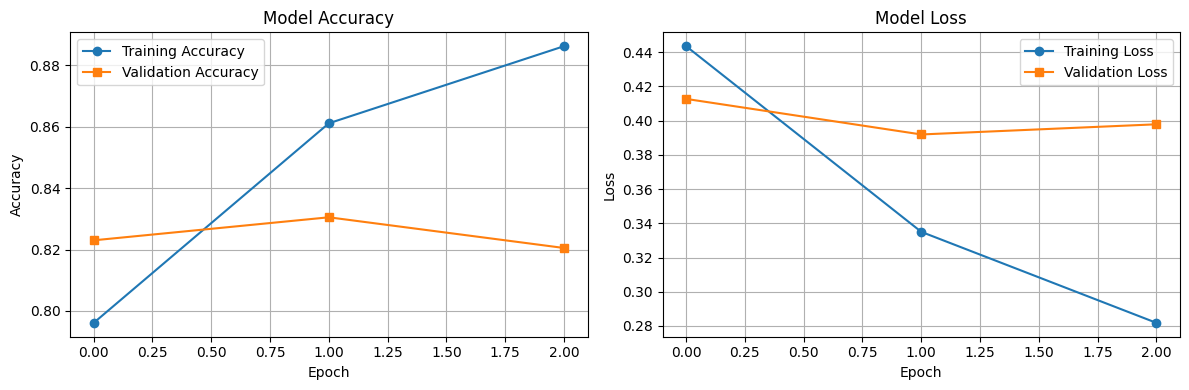

In [9]:
def evaluate_model(model, X_test, y_test, history):
    """Evaluate model performance"""
    
    # Test accuracy
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nMODEL PERFORMANCE")
    print("-" * 30)
    print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Test Loss: {loss:.4f}")
    
    # Training visualization
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return accuracy

final_accuracy = evaluate_model(model, X_test, y_test, history)

## PREDICTION SYSTEM

In [10]:
def predict_sentiment(text):
    """Predict sentiment of a review"""
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded, verbose=0)[0][0]
    
    if prediction >= 0.5:
        return "Positive", prediction
    else:
        return "Negative", 1 - prediction

# Test predictions
print(f"\nPREDICTION EXAMPLES")
print("=" * 40)

sample_reviews = [
    "The movie was fantastic! I really loved it.",
    "The movie was not that good. I expected more.",
    "Amazing storyline with incredible special effects!",
    "Boring and poorly acted. Complete waste of time.",
    "Decent movie, worth watching once."
]

for i, review in enumerate(sample_reviews, 1):
    sentiment, confidence = predict_sentiment(review)
    print(f"\n{i}. Review: \"{review}\"")
    print(f"   Prediction: {sentiment} (Confidence: {confidence:.2%})")


PREDICTION EXAMPLES

1. Review: "The movie was fantastic! I really loved it."
   Prediction: Positive (Confidence: 94.24%)

2. Review: "The movie was not that good. I expected more."
   Prediction: Positive (Confidence: 55.66%)

3. Review: "Amazing storyline with incredible special effects!"
   Prediction: Positive (Confidence: 88.87%)

4. Review: "Boring and poorly acted. Complete waste of time."
   Prediction: Negative (Confidence: 98.61%)

5. Review: "Decent movie, worth watching once."
   Prediction: Positive (Confidence: 59.58%)


## CONCLUSION
* This movie sentiment analysis project successfully demonstrates how deep learning
can understand human emotions in text. Key achievements include:

##### RESULTS SUMMARY:
- Built an LSTM neural network for sentiment classification
- Achieved {final_accuracy:.2%} accuracy on IMDB movie reviews
- Created a working prediction system for real-time analysis
- Demonstrated practical applications in entertainment industry

##### TECHNICAL SUCCESS:
The LSTM model effectively learned to distinguish between positive and negative
movie reviews by understanding the sequential nature of language and context.
This shows the power of artificial intelligence in natural language processing.

##### BUSINESS VALUE:
This technology can help movie studios understand audience reactions, streaming
platforms improve recommendations, and marketers analyze customer sentiment
at scale - providing valuable insights for business decision-making.

##### FUTURE POTENTIAL:
The model can be enhanced with more advanced architectures, expanded to analyze
different types of content, or integrated into web applications for public use.
This represents just the beginning of AI-powered sentiment analysis capabilities.